# ___

# [ Machine Learning in Geosciences ]


## **Test 2 ** 

*Author: Petra Krsková*

*Date: 13.5.2024* 

___


### 1.1 The Problem

TASK: 

1/ Develop a Neural Network model in PyTorch to fit a model to the blow given simulated data. 

2/ Find the best depth of the model in order to minimize the error (MSE) but assuring the model generalize well on test data as well. 

In this work, we explore Deep Learning approach to **predict the non-linear function**.


### 1.2 Assumptions

* The problem is a non-linear regression task; 
* There is no continuous flow of data, hence batch learning shall be applied; 
* There are enough measurements with rather low noise, so we would not need model regularisation to fit reasonable model. 


### 1.3 Expected results 

* Deep Learning ANN model to predict the y based on the input X. 
___    


In [130]:
import numpy as np
np.random.seed(42)
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [116]:
# Data 
x = np.arange(-1.2, 1.8, 0.01)
y = (x**6) - (x**5) - (x**4) - (x**3) - (x**2) - x 
noise = 0.4 * np.random.normal(size=x.size)
data = y + noise

In [117]:
# reshape data
x = x.reshape(-1,1)
data = data.reshape(-1,1)

# convert data into torch tensors
t_x = torch.from_numpy(x).float()
t_data = torch.from_numpy(data).float()

In [118]:
# explore data
print(f"x shape: {t_x.shape}")
print(f"y shape: {t_data.shape}")
print(type(t_x))

x shape: torch.Size([300, 1])
y shape: torch.Size([300, 1])
<class 'torch.Tensor'>


In [119]:
# explore data
print(f"x shape: {t_x.dtype}")
print(f"y shape: {t_data.dtype}")

x shape: torch.float32
y shape: torch.float32


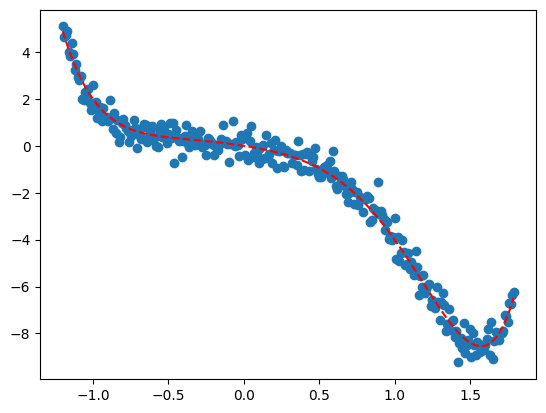

In [120]:
# Plotting the simulated data
plt.scatter(x,data)
plt.plot(x, y, 'r--')
plt.show()

### Design the ANN model

In [121]:
# Nonlinear model with n hidden layers 
class NonLinear(nn.Module):
    def __init__(self, num_features, num_hidden_layers):
        super(NonLinear, self).__init__()
        
        self.nn_input = nn.Sequential(nn.Linear(num_features, 32),
                                      nn.ReLU())
        
        self.num_hidden_layers = num_hidden_layers 
        self.hidden_layer_list = []
        self.hidden_layer = nn.Sequential(nn.Linear(32, 32), 
                                  nn.ReLU()
                                 )     
        for i in range(num_hidden_layers):
            self.hidden_layer_list.append(self.hidden_layer)
    
        self.hidden_layers = nn.ModuleList(self.hidden_layer_list)        
        

        self.nn_output = nn.Sequential(nn.Linear(32,1))

    def forward(self, inputs):
        x = self.nn_input(inputs)

        for i in range(len(self.hidden_layers)):
            x = self.hidden_layers[i](x) 
        
        x = self.nn_output(x)
    
        return (x)

In [160]:
# instantiate the model (num_features, num_hidden_layers)
model1 = NonLinear(1,3)
model1

NonLinear(
  (nn_input): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layer): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layers): ModuleList(
    (0-2): 3 x Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (nn_output): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [161]:
# optimization 
learning_rate = 0.01
epoches = 3000

# loss: regression -> MSE
criterion = nn.MSELoss()

# optimizer: stochastic gradient descent 
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

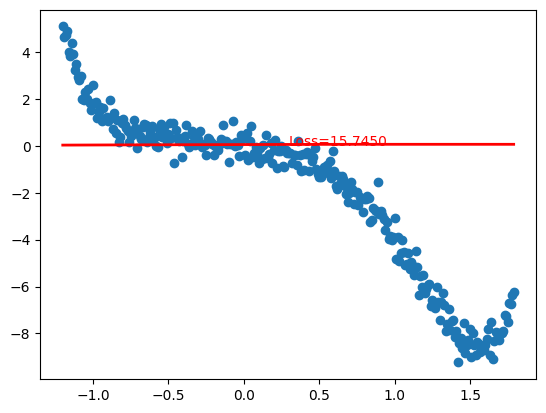

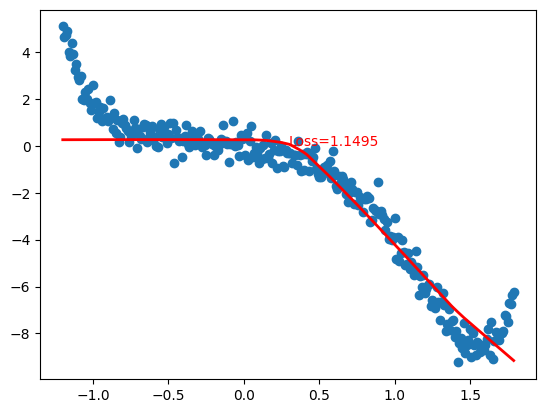

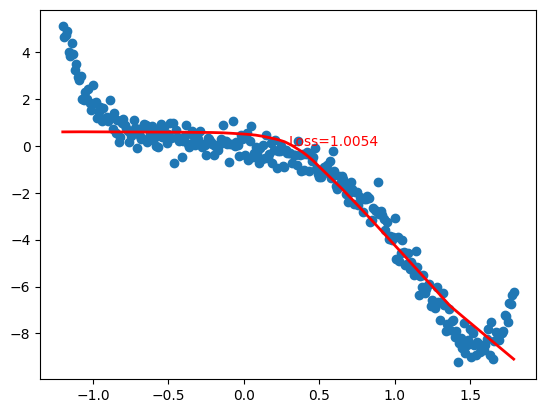

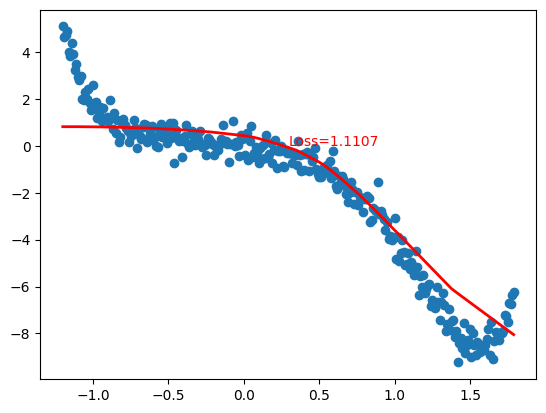

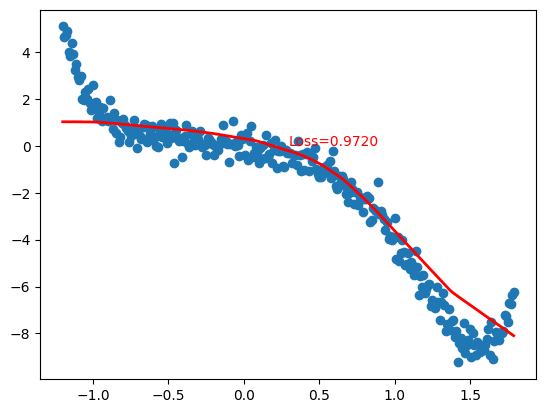

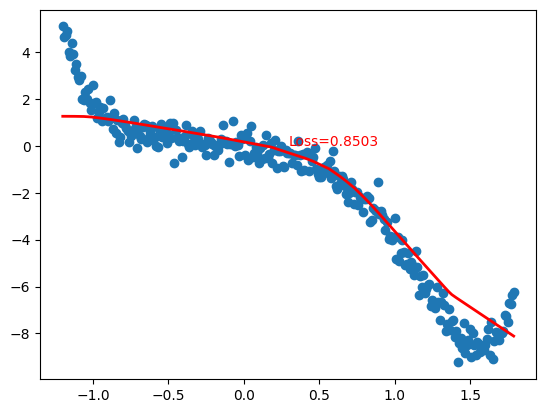

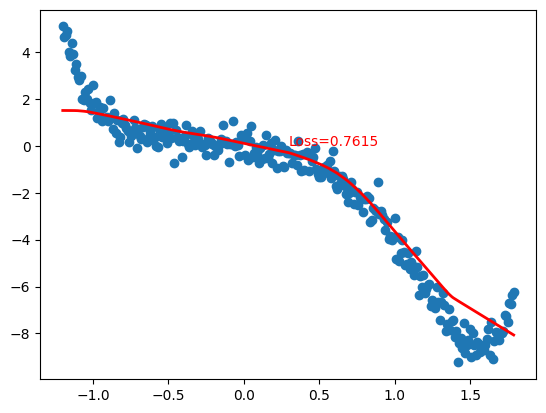

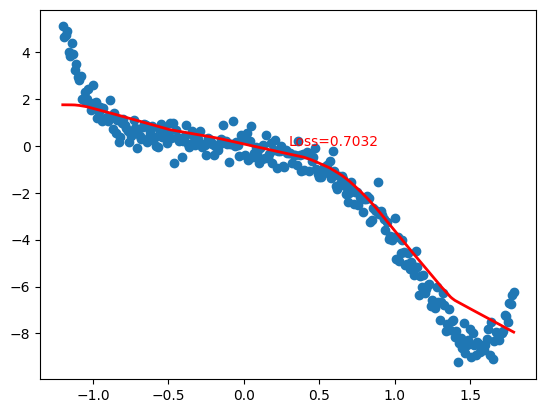

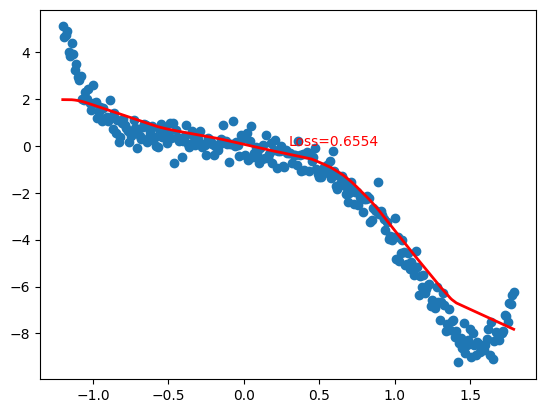

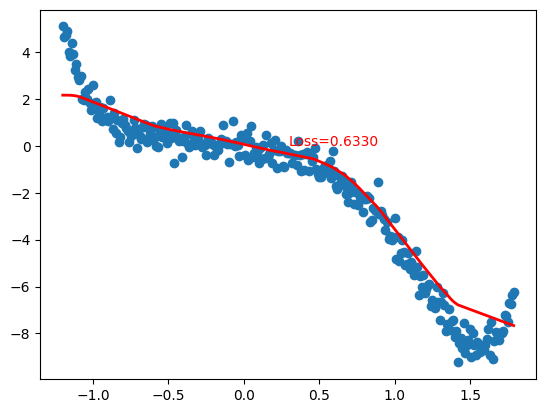

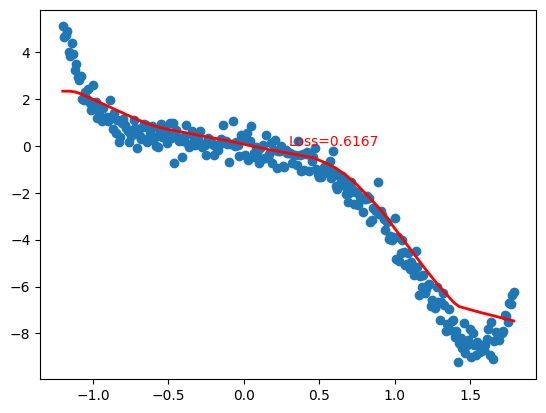

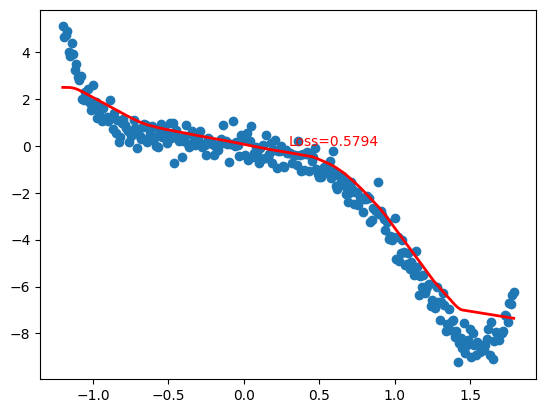

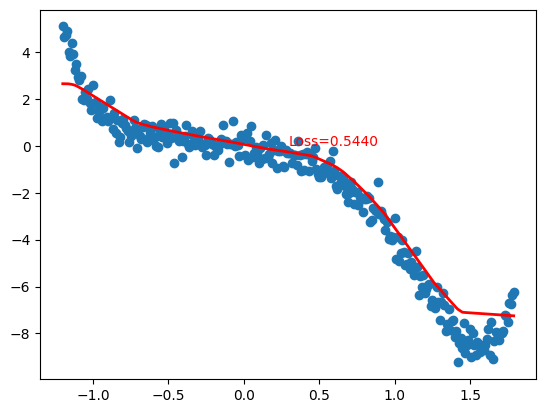

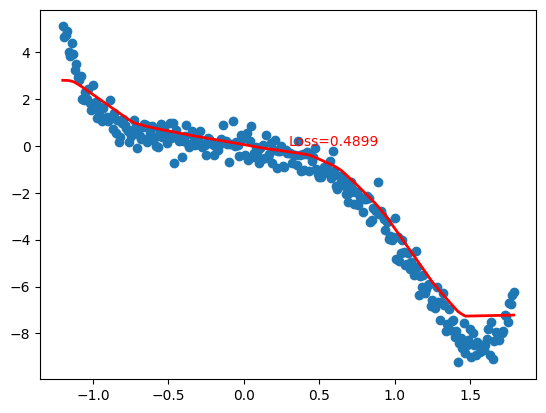

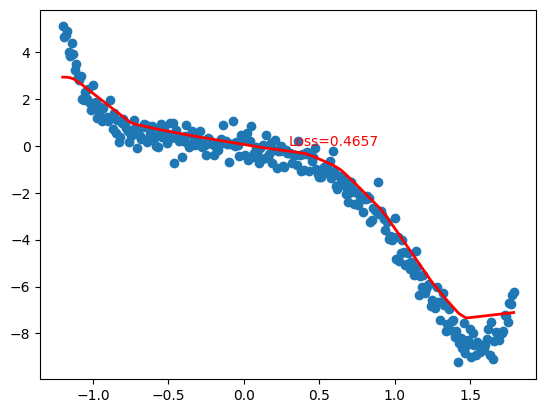

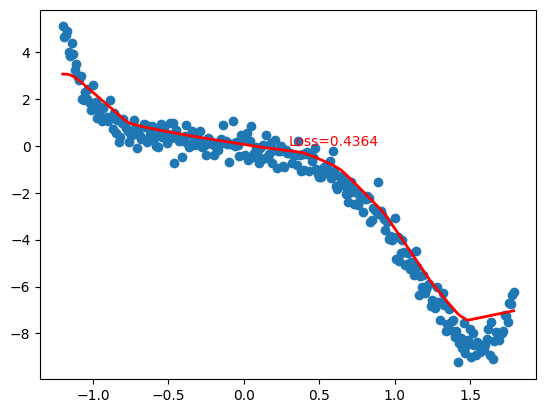

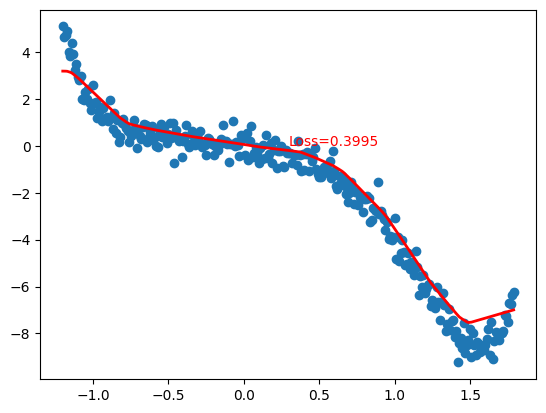

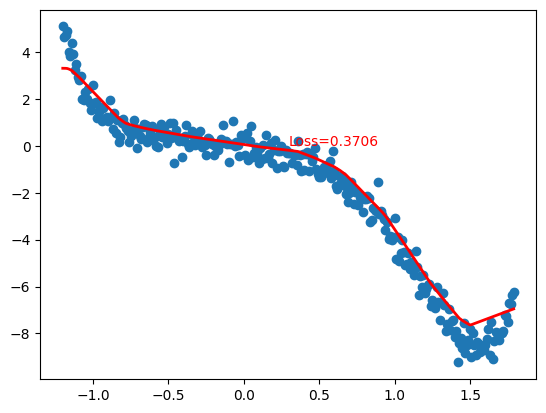

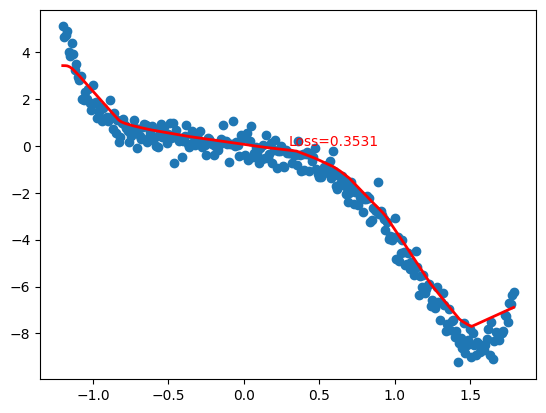

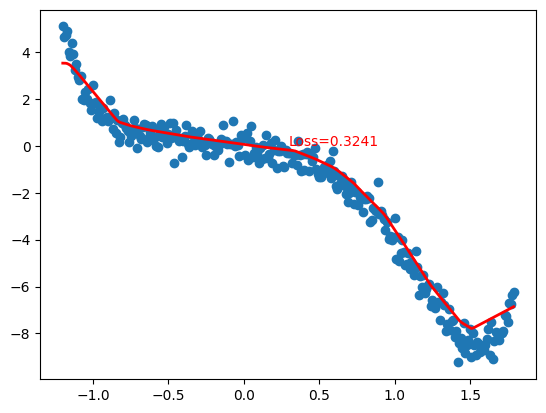

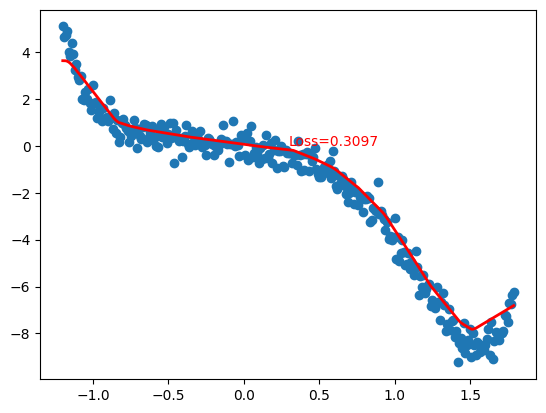

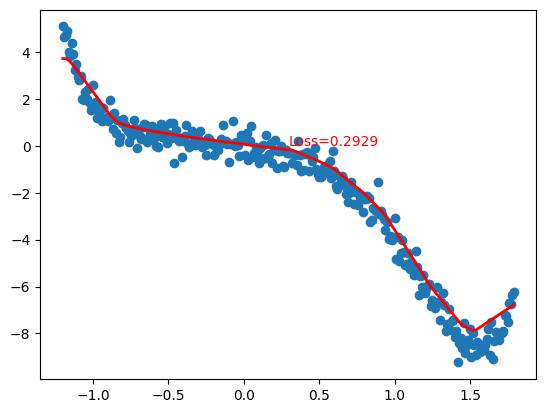

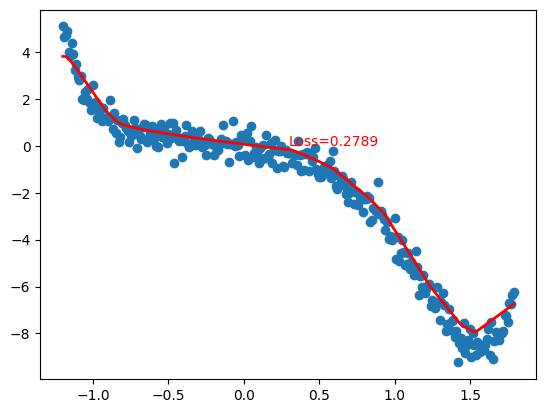

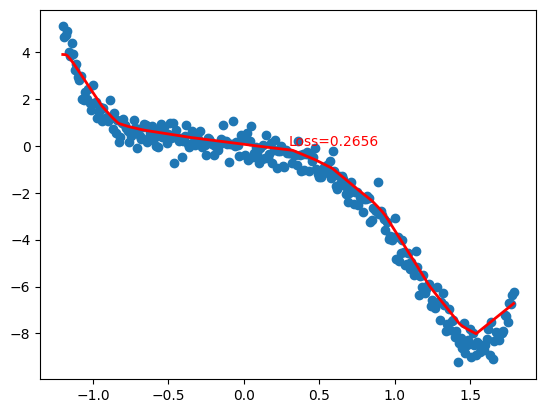

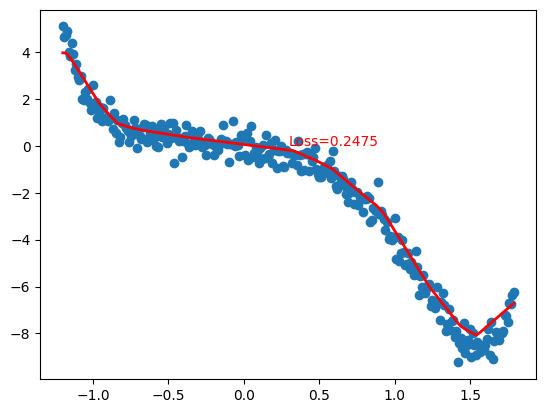

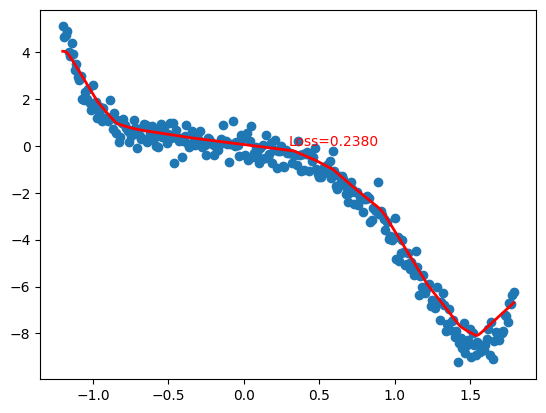

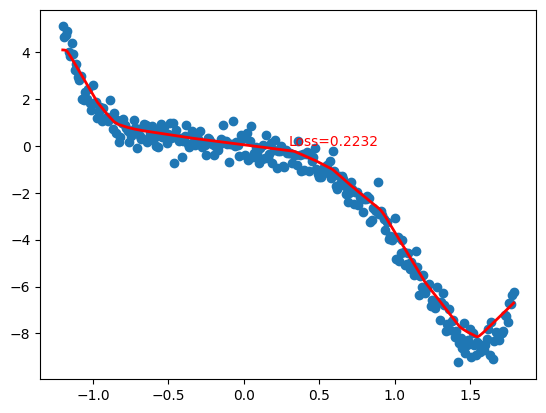

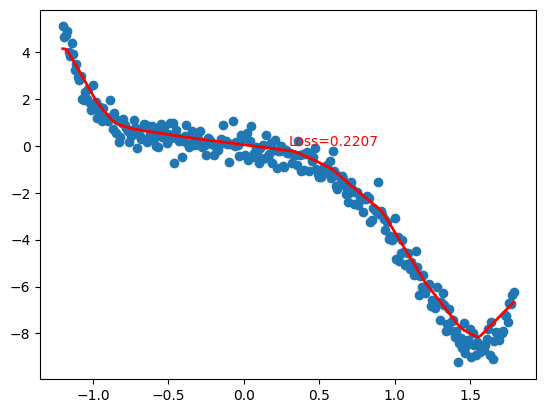

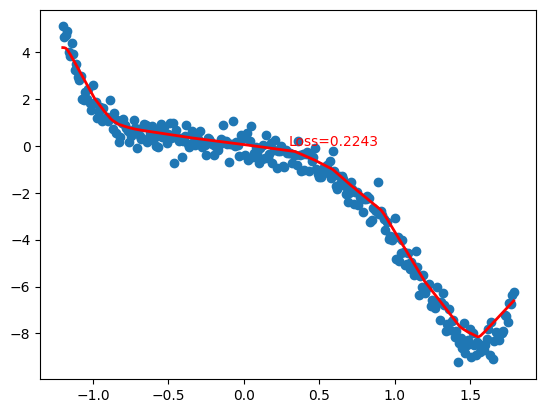

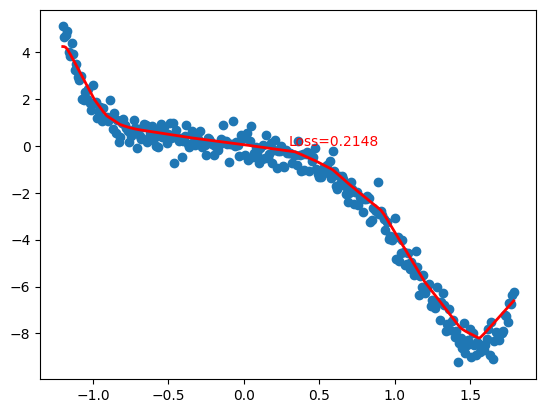

In [162]:
# training for given number of layers
inputs = Variable(t_x)
outputs = Variable(t_data)

for i in range(epoches):
    # apply model
    prediction = model1(inputs)
    # get loss 
    loss = criterion(prediction,t_data)
    # remove gradiens from optimizaer previous step with .zero_grad()
    optimizer.zero_grad() 
    # backpropagation on loss 
    loss.backward() 
    # optimization .step()
    optimizer.step() 

    # plot model result with loss 
    if i % 100 == 0:
        plt.cla()
        plt.scatter(t_x.data.numpy(), t_data.data.numpy())
        plt.plot(t_x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.3, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.01)

plt.show()

In [164]:
print(f"final loss: {loss.data.numpy()}")

final loss: 0.21059207618236542


In [128]:
# training for n hidden layers
max_depth = 10
depth_loss = {}

# optimization 
learning_rate = 0.01
epoches = 3000

# data
inputs = Variable(t_x)
outputs = Variable(t_data)

for n in range(2,max_depth,1):
    # instantiate the model (num_features, num_hidden_layers)
    model = NonLinear(1,n)

    # loss: regression -> MSE
    criterion = nn.MSELoss()

    # optimizer: stochastic gradient descent 
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for i in range(epoches):
        # apply model
        prediction = model(inputs)
        # get loss 
        loss = criterion(prediction,t_data)
        # remove gradiens from optimizaer previous step with .zero_grad()
        optimizer.zero_grad() 
        # backpropagation on loss 
        loss.backward() 
        # optimization .step()
        optimizer.step() 
    
    print(f"depth: {n}, loss: {loss.data.numpy()}")

    # add final loss to the dictionary
    depth_loss[n] = loss.data.numpy()

depth: 2, loss: 0.2018115520477295
depth: 3, loss: 0.21699397265911102
depth: 4, loss: 0.18008136749267578
depth: 5, loss: 0.21627245843410492
depth: 6, loss: 11.915990829467773
depth: 7, loss: 11.91640853881836
depth: 8, loss: 11.916332244873047
depth: 9, loss: 11.916424751281738


In [126]:
print(depth_loss)

{2: array(0.22782537, dtype=float32), 3: array(0.19213349, dtype=float32), 4: array(0.19994874, dtype=float32), 5: array(0.20884112, dtype=float32), 6: array(0.19167888, dtype=float32), 7: array(11.916414, dtype=float32), 8: array(11.902683, dtype=float32), 9: array(11.891879, dtype=float32)}


In [127]:
# find depth with the lowest loss value
best_depth = min(depth_loss, key= depth_loss.get)
print(f"best depth: {best_depth}")

best depth: 6


Text(0.5, 1.0, 'Learning rate: 0.01, epoches: 3000')

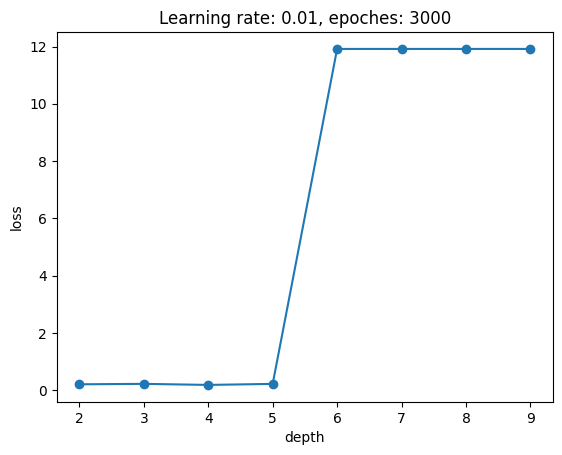

In [129]:
# plot the depth and loss
plt.scatter(depth_loss.keys(),depth_loss.values())
plt.plot(depth_loss.keys(),depth_loss.values())
plt.xlabel("depth")
plt.ylabel("loss")
plt.title(f"Learning rate: {learning_rate}, epoches: {epoches}")

### Convert finding the best depth into function

In [140]:
def find_best_depth(x,y,max_depth,lr,epoches):
    max_depth = max_depth
    depth_loss = {}

    # optimization 
    learning_rate = lr
    epoches = epoches

    # data
    inputs = Variable(x)
    outputs = Variable(y)

    for n in range(2,max_depth,1):
        # instantiate the model (num_features, num_hidden_layers)
        model = NonLinear(1,n)

        # loss: regression -> MSE
        criterion = nn.MSELoss()

        # optimizer: stochastic gradient descent 
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

        for i in range(epoches):
            # apply model
            prediction = model(inputs)
            # get loss 
            loss = criterion(prediction,y)
            # remove gradiens from optimizaer previous step with .zero_grad()
            optimizer.zero_grad() 
            # backpropagation on loss 
            loss.backward() 
            # optimization .step()
            optimizer.step() 
        
        print(f"depth: {n}, loss: {loss.data.numpy()}")

        # add final loss to the dictionary
        depth_loss[n] = loss.data.numpy()
    
    best_depth = min(depth_loss, key= depth_loss.get)

    return best_depth

### Run model on train and test data

In [137]:
# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(t_x, t_data, test_size=0.5, random_state=42)

In [139]:
# check data shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([150, 1])
torch.Size([150, 1])
torch.Size([150, 1])
torch.Size([150, 1])


In [142]:
# find the best depth for the train set
max_depth = 10
lr = 0.01
epoches = 3000

depth = find_best_depth(X_train, y_train, max_depth, lr, epoches)

depth: 2, loss: 0.18692100048065186
depth: 3, loss: 0.17206397652626038
depth: 4, loss: 0.25133559107780457
depth: 5, loss: 0.22372716665267944
depth: 6, loss: 0.41332167387008667
depth: 7, loss: 0.2191321849822998
depth: 8, loss: 0.30998900532722473
depth: 9, loss: 0.26276737451553345


In [154]:
print(f"best depth: {depth}")

best depth: 3


In [147]:
# initialize model with the best dept
test_model = NonLinear(1,depth)

In [150]:
# get losses for the train and test set

# loss: regression -> MSE
criterion = nn.MSELoss()

# optimizer: stochastic gradient descent 
optimizer = torch.optim.SGD(test_model.parameters(), lr=learning_rate)

# log loss history
train_loss, test_loss = [], []

for i in range(epoches):
    # apply model
    prediction = test_model(X_train)
    # get loss 
    loss = criterion(prediction,y_train)
    # remove gradiens from optimizaer previous step with .zero_grad()
    optimizer.zero_grad() 
    # backpropagation on loss 
    loss.backward() 
    # optimization .step()
    optimizer.step() 

    # get testing loss
    pred_test = test_model(X_test)
    loss_test = criterion(pred_test,y_test)

    # store the losses
    train_loss.append(loss.item())
    test_loss.append(loss_test.item())

Text(0.5, 1.0, 'Depth: 3, learning rate: 0.01')

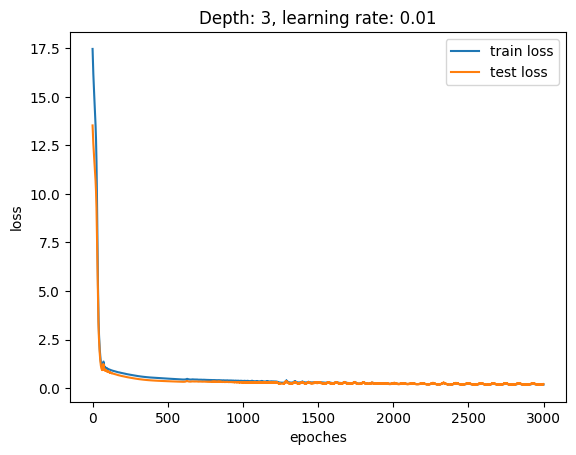

In [165]:
# plot the losses
plt.plot(train_loss, label="train loss")
plt.plot(test_loss, label="test loss")
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend()
plt.title(f"Depth: {depth}, learning rate: {lr}")

In [168]:
# final losses
print(f"train loss: {train_loss[-1]:.3f}")
print(f"test loss: {test_loss[-1]:.3f}")

train loss: 0.181
test loss: 0.209


### Results

The model was first tested on the whole dataset and the losses for given depths (number of hidden layers) were printed. This was then transformed into a function that takes input data and finds the depth of the model with the lowest loss value. The input dataset was evenly split into train and test set. The optimal depth of the model was found for the train set and it is 3 hidden layers. According to that was then the nonlinear model initialized with 3 hidden layers and train and test loss was calculated. For 3000 epochs and learning rate 0,01 were the final losses 0,181 for train set and 0,209 for test set.